In [1]:
%matplotlib inline
#import matplotlib as plt

In [2]:
import os
home_folder = os.path.expanduser("~")
print(home_folder)
print(os)

/Users/yt
<module 'os' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/os.py'>


In [3]:
# Change this to the location of your dataset
data_folder = os.path.join(home_folder, "Data", "Ionosphere")
data_filename = os.path.join(data_folder, "ionosphere.data")
print(data_filename)

/Users/yt/Data/Ionosphere/ionosphere.data


In [4]:
import csv
import numpy as np

# Size taken from the dataset and is known
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        # Set the appropriate row in our dataset
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'


In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print(X_train.shape)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

(263, 34)
There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier(n_neighbors=2)

In [7]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [8]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 92.0%


In [9]:
from sklearn.cross_validation import cross_val_score

In [10]:
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 86.0%


In [11]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
print(parameter_values)
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)
print(scores)
print(np.mean(scores))
print(avg_scores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[ 0.81196581  0.67521368  0.88888889]
0.792022792023
[0.83475783475783472, 0.86039886039886049, 0.82905982905982911, 0.83760683760683763, 0.8233618233618234, 0.84045584045584043, 0.80056980056980054, 0.83760683760683763, 0.80911680911680917, 0.83190883190883191, 0.79487179487179482, 0.81481481481481488, 0.80626780626780636, 0.8205128205128206, 0.80056980056980054, 0.81481481481481488, 0.79202279202279202, 0.79772079772079774, 0.7806267806267807, 0.79202279202279202]


In [12]:
plt.plot?

Object `plt.plot` not found.


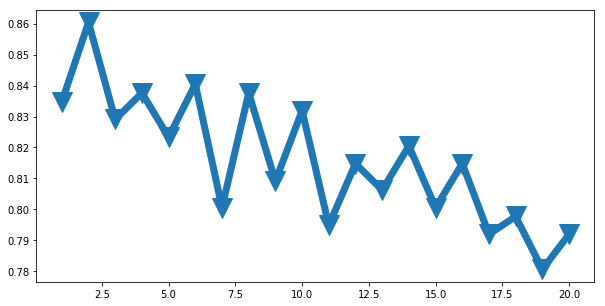

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(parameter_values, avg_scores, '-v', linewidth=7, markersize=20)
#plt.axis([0, max(parameter_values), 0, 1.0])

1 [ 0.82051282  0.79487179  0.88888889]
2 [ 0.83760684  0.82905983  0.91452991]
3 [ 0.79487179  0.79487179  0.8974359 ]
4 [ 0.81196581  0.8034188   0.8974359 ]
5 [ 0.82051282  0.78632479  0.86324786]
6 [ 0.83760684  0.8034188   0.88034188]
7 [ 0.82905983  0.72649573  0.84615385]
8 [ 0.83760684  0.78632479  0.88888889]
9 [ 0.82905983  0.74358974  0.85470085]
10 [ 0.82905983  0.78632479  0.88034188]
11 [ 0.82905983  0.67521368  0.88034188]
12 [ 0.82051282  0.74358974  0.88034188]
13 [ 0.82905983  0.72649573  0.86324786]
14 [ 0.82905983  0.75213675  0.88034188]
15 [ 0.82051282  0.71794872  0.86324786]
16 [ 0.82051282  0.73504274  0.88888889]
17 [ 0.81196581  0.68376068  0.88034188]
18 [ 0.81196581  0.69230769  0.88888889]
19 [ 0.81196581  0.65811966  0.87179487]
20 [ 0.81196581  0.67521368  0.88888889]


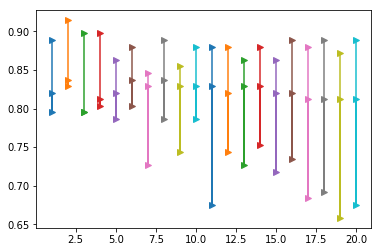

In [14]:
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    print(parameter,scores)
    plt.plot([parameter]*3 , scores, '->')
zip?

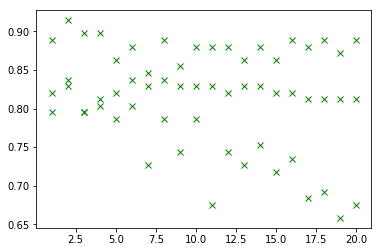

In [15]:
plt.plot(parameter_values, all_scores, 'gx')

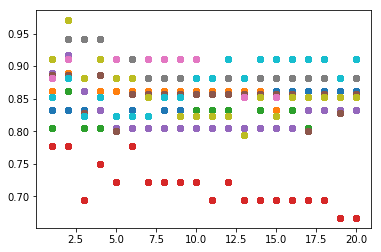

In [16]:
from collections import defaultdict
all_scores = defaultdict(list)
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    for i in range(100):
        estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=10)
        all_scores[n_neighbors].append(scores)
for parameter in parameter_values:
    scores = all_scores[parameter]
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')


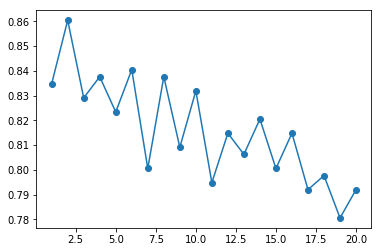

In [139]:
plt.plot(parameter_values, avg_scores, '-o')

In [99]:
from sklearn.preprocessing import MinMaxScaler


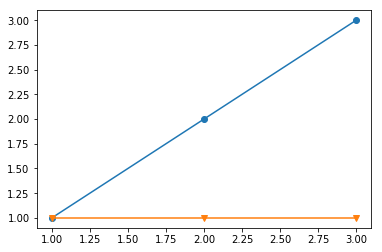

In [103]:
from matplotlib import pyplot as plt
plt.plot([1,2,3] , [1,2,3], '-o',[1,2,3] , [1]*3, '-v')

In [17]:
head?

Object `head` not found.


In [18]:
head -10?

SyntaxError: invalid syntax (<ipython-input-18-55879d69bcd5>, line 1)